# Time Series Prediction Using Prophet package

In [2]:
!pip install prophet #install prophet package

  Using cached holidays-0.55-py3-none-any.whl.metadata (23 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.2 MB/s eta 0:00:05
   ---------------------------------------- 0.1/13.3 MB 975.2 kB/s eta 0:00:14
    --------------------------------------- 0.2/13.3 MB 1.9 MB/s eta 0:00:08
    --------------------------------------- 0.2/13.3 MB 1.9 MB/s eta 0:00:08
    --------------------------------------- 0.2/13.3 MB 1.9 MB/s eta 0:00:08
    --------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.5/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.5/13.3 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.6 MB/s eta 0:00:08
   - -------------

In [4]:
import pandas as pd
from prophet import Prophet

In [6]:
df = pd.read_csv('moneyExchangeKtoB.csv')

In [7]:
df.head()

,Date,KyatToBaht
0,6/1/2024,117.2
1,6/2/2024,116.3
2,6/3/2024,114.0
3,6/4/2024,119.0
4,6/5/2024,122.0


In [8]:
df.describe()

,KyatToBaht
count,65.000000
mean,129.087692
std,9.238409
min,114.000000
25%,122.100000
50%,125.300000
75%,135.500000
max,149.500000


In [10]:
df.dtypes

Date           object
KyatToBaht    float64
dtype: object

In [11]:
df['date'] = pd.to_datetime(df['Date'])

In [13]:
df.dtypes

Date                  object
KyatToBaht           float64
date          datetime64[ns]
dtype: object

In [14]:
df.head()

,Date,KyatToBaht,date
0,6/1/2024,117.2,2024-06-01
1,6/2/2024,116.3,2024-06-02
2,6/3/2024,114.0,2024-06-03
3,6/4/2024,119.0,2024-06-04
4,6/5/2024,122.0,2024-06-05


In [15]:
df.drop(['Date'],axis=1,inplace=True)

In [17]:
df.columns = ['y','ds']
df.head()

,y,ds
0,117.2,2024-06-01
1,116.3,2024-06-02
2,114.0,2024-06-03
3,119.0,2024-06-04
4,122.0,2024-06-05


## Train Model

In [22]:
m = Prophet(interval_width=0.95,daily_seasonality=True) #confident interval 95% and daily changes
m.fit(df)

17:05:40 - cmdstanpy - INFO - Chain [1] start processing
17:05:40 - cmdstanpy - INFO - Chain [1] done processing


## Forecast

In [25]:
future = m.make_future_dataframe(periods=30, freq='D') #forecast for future 100 days
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-06-01,6.977030,113.926905,121.314580,6.977030,6.977030,110.493272,110.493272,110.493272,110.234124,110.234124,110.234124,0.259148,0.259148,0.259148,0.0,0.0,0.0,117.470302
1,2024-06-02,7.253274,113.124210,120.450978,7.253274,7.253274,109.637020,109.637020,109.637020,110.234124,110.234124,110.234124,-0.597104,-0.597104,-0.597104,0.0,0.0,0.0,116.890293
2,2024-06-03,7.529517,113.124359,120.060053,7.529517,7.529517,109.013809,109.013809,109.013809,110.234124,110.234124,110.234124,-1.220315,-1.220315,-1.220315,0.0,0.0,0.0,116.543326
3,2024-06-04,7.805760,113.813943,121.054903,7.805760,7.805760,109.706184,109.706184,109.706184,110.234124,110.234124,110.234124,-0.527940,-0.527940,-0.527940,0.0,0.0,0.0,117.511944
4,2024-06-05,8.082004,115.389756,122.494878,8.082004,8.082004,110.857687,110.857687,110.857687,110.234124,110.234124,110.234124,0.623563,0.623563,0.623563,0.0,0.0,0.0,118.939690


In [26]:
df.tail()

,y,ds
60,148.0,2024-07-31
61,149.0,2024-08-01
62,149.5,2024-08-02
63,148.8,2024-08-03
64,147.0,2024-08-04


In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
90,2024-08-30,65.024661,163.279971,187.283332,53.614207,75.530714,110.932821,110.932821,110.932821,110.234124,110.234124,110.234124,0.698697,0.698697,0.698697,0.0,0.0,0.0,175.957482
91,2024-08-31,66.042215,163.798174,188.297565,54.110906,77.107278,110.493272,110.493272,110.493272,110.234124,110.234124,110.234124,0.259148,0.259148,0.259148,0.0,0.0,0.0,176.535487
92,2024-09-01,67.059769,163.080302,189.212546,54.607203,78.882415,109.637020,109.637020,109.637020,110.234124,110.234124,110.234124,-0.597104,-0.597104,-0.597104,0.0,0.0,0.0,176.696789
93,2024-09-02,68.077323,163.641795,189.762746,54.739048,80.400482,109.013809,109.013809,109.013809,110.234124,110.234124,110.234124,-1.220315,-1.220315,-1.220315,0.0,0.0,0.0,177.091132
94,2024-09-03,69.094877,163.711915,193.172144,55.278923,81.883540,109.706184,109.706184,109.706184,110.234124,110.234124,110.234124,-0.527940,-0.527940,-0.527940,0.0,0.0,0.0,178.801061


In [31]:
df2 = forecast[['ds','yhat']]

## Plotting the forecast

C:\Users\kokha\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\kokha\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


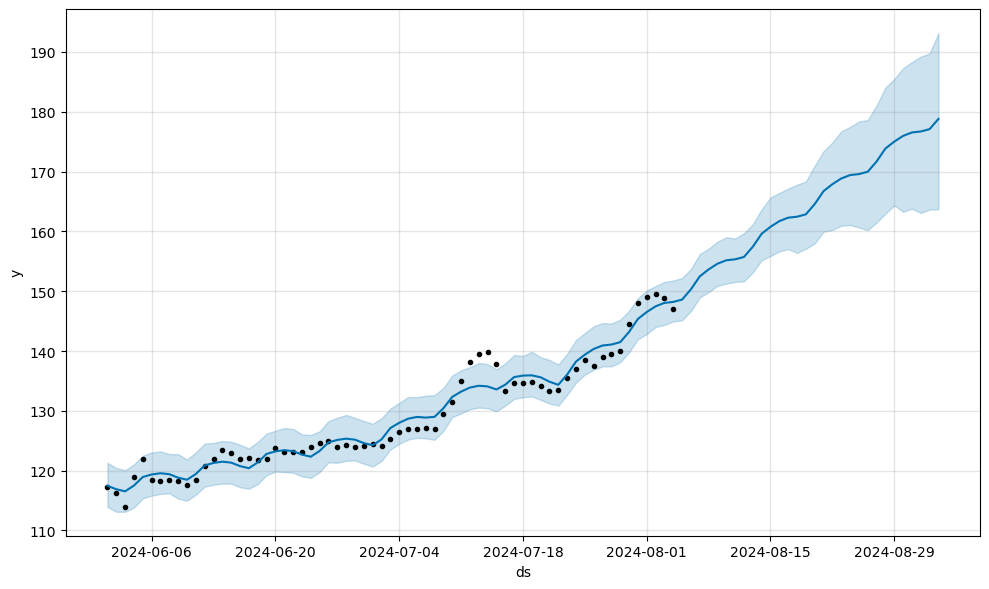

In [29]:
plot1 = m.plot(forecast)

C:\Users\kokha\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\kokha\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\kokha\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

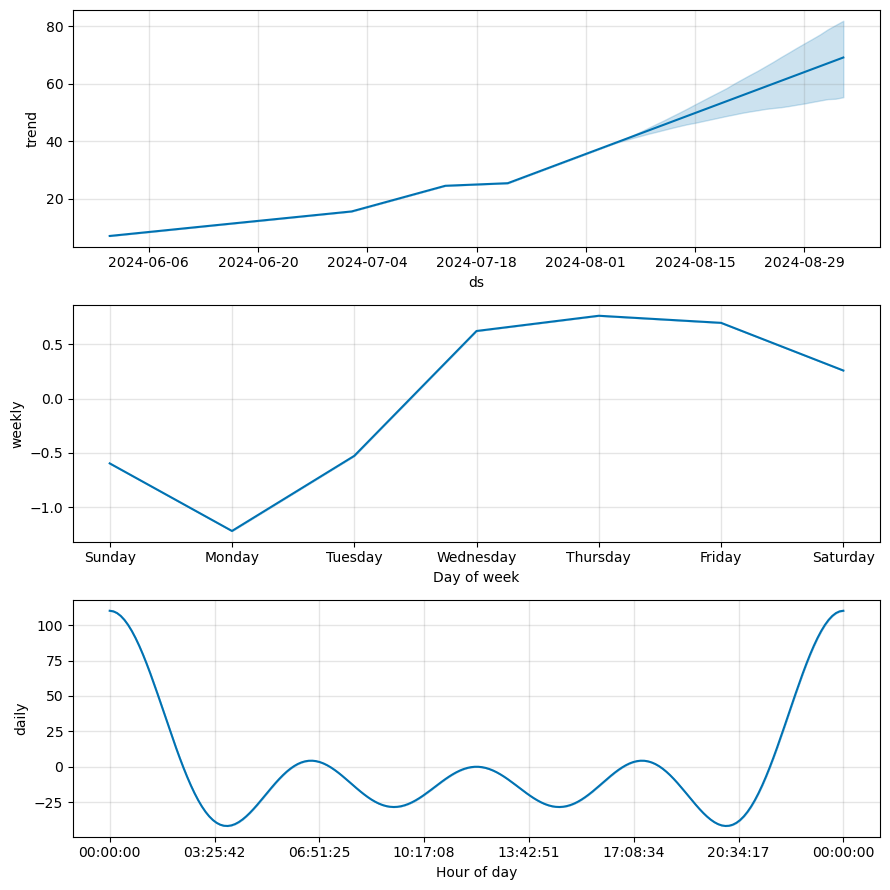

In [30]:
plot2 = m.plot_components(forecast)
# plot the trend, daily, weekly variation

In [32]:
df2.to_csv('forecast.csv') #export as csv file